# gas_turbines.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
gt = pd.read_csv("gas_turbines.csv")
gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
gt.describe()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [4]:
gt.shape


(15039, 11)

In [5]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
gt.columns


Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [7]:
gt.isnull().sum()


AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
# check for duplicate data
duplicate = gt.duplicated()
print(duplicate.sum())
gt[duplicate]

0


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [9]:
X = gt.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= gt.loc[:,['TEY']]

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [11]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [12]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_17124\1991303876.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: -0.14 (0.15) MSE


In [13]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-1.212586 , -1.22159  , -1.2228304, ..., -1.2916659, -1.2462463,
       -1.2067876], dtype=float32)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [15]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)
prediction

array([-0.61903644, -0.25303552,  0.01691921, ..., -0.28348288,
       -1.5071924 , -0.60846436], dtype=float32)

In [16]:
X = gt.drop(columns = ['TEY'], axis = 1) 
y = gt.iloc[:,7]

In [17]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [18]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [19]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [20]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs)

Epoch 1/100
381/381 [==============================] - 3s 4ms/step - loss: 3058.0051 - mean_squared_error: 3058.0051 - val_loss: 167.8214 - val_mean_squared_error: 167.8214
Epoch 2/100
381/381 [==============================] - 2s 4ms/step - loss: 84.9918 - mean_squared_error: 84.9918 - val_loss: 63.1683 - val_mean_squared_error: 63.1683
Epoch 3/100
381/381 [==============================] - 1s 4ms/step - loss: 36.5504 - mean_squared_error: 36.5504 - val_loss: 31.2118 - val_mean_squared_error: 31.2118
Epoch 4/100
381/381 [==============================] - 1s 4ms/step - loss: 18.2114 - mean_squared_error: 18.2114 - val_loss: 14.5335 - val_mean_squared_error: 14.5335
Epoch 5/100
381/381 [==============================] - 1s 3ms/step - loss: 9.3309 - mean_squared_error: 9.3309 - val_loss: 7.4136 - val_mean_squared_error: 7.4136
Epoch 6/100
381/381 [==============================] - 1s 3ms/step - loss: 5.2004 - mean_squared_error: 5.2004 - val_loss: 4.1317 - val_mean_squared_error: 4.1317


In [21]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)


47/47 [==============================] - 0s 2ms/step - loss: 1.3397 - mean_squared_error: 1.3397


In [22]:
predictions = model.predict_on_batch(X_test_scaled)

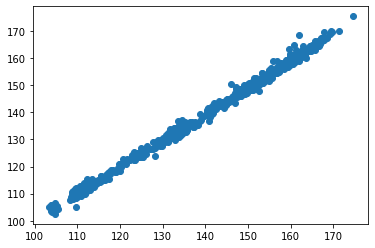

In [23]:
plt.scatter(y_test, predictions)

In [24]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,133.976410,0.359653
1,111.88,111.525894,0.316505
2,133.72,134.206116,0.363533
3,133.79,133.081848,0.529301
4,110.77,111.100327,0.298209
...,...,...,...
1499,132.85,132.489883,0.271070
1500,125.07,123.563622,1.204428
1501,160.95,160.696152,0.157719
1502,133.12,132.685501,0.326396


# forestfires.csv

In [25]:
data=pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [36]:
mapping = {'small': 1, 'large': 2}

In [37]:
data = data.replace(mapping)

In [38]:
x = np.array(data.iloc[:,0:28])
y = np.array(data.iloc[:,28])

In [39]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [40]:
x_norm = norm_func(x)

In [41]:
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.2,stratify = y)

In [42]:
model = Sequential()
model.add(Dense(8, input_dim=28, activation='linear'))
model.add(Dense(4,  activation='tanh'))
model.add(Dense(1,  activation='sigmoid'))

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
history=model.fit(x_train, y_train, validation_split=0.3, epochs=120, batch_size=10)

Epoch 1/120
29/29 [==============================] - 3s 18ms/step - loss: 0.3868 - accuracy: 0.7197 - val_loss: 0.2932 - val_accuracy: 0.7500
Epoch 2/120
29/29 [==============================] - 0s 5ms/step - loss: 0.1660 - accuracy: 0.7232 - val_loss: 0.0819 - val_accuracy: 0.7500
Epoch 3/120
29/29 [==============================] - 0s 5ms/step - loss: -0.0486 - accuracy: 0.7232 - val_loss: -0.1181 - val_accuracy: 0.7500
Epoch 4/120
29/29 [==============================] - 0s 5ms/step - loss: -0.2551 - accuracy: 0.7232 - val_loss: -0.2924 - val_accuracy: 0.7500
Epoch 5/120
29/29 [==============================] - 0s 3ms/step - loss: -0.4303 - accuracy: 0.7232 - val_loss: -0.4583 - val_accuracy: 0.7500
Epoch 6/120
29/29 [==============================] - 0s 4ms/step - loss: -0.5921 - accuracy: 0.7232 - val_loss: -0.5837 - val_accuracy: 0.7500
Epoch 7/120
29/29 [==============================] - 0s 6ms/step - loss: -0.7228 - accuracy: 0.7232 - val_loss: -0.6929 - val_accuracy: 0.7500
Ep

In [45]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 3ms/step - loss: -5.0498 - accuracy: 0.7312
accuracy: 73.12%


In [46]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: -5.0583 - accuracy: 0.7308
accuracy: 73.08%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


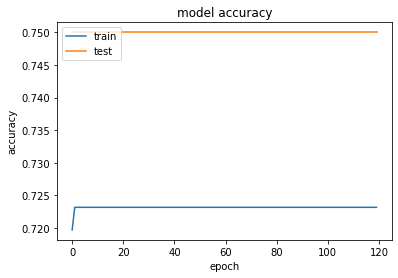

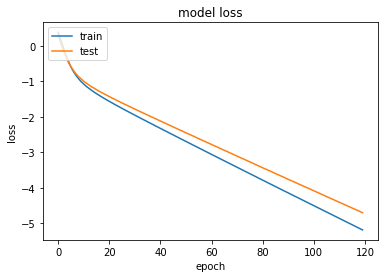

In [47]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()